In [1]:
#Libraries
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb


In [2]:
wine = pd.read_excel("wine_characteristics.xlsx")
wine.head()

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Wine ID,Wine Type,Short Wine Link,Alcohol Content_y,Allergens_y,Average Price_y,Grapes_y,Grapes_url_y,ImageURL_y,Region_y,Region_url_y,Wine Style_y,Wine Style_ur_y
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255 ratings,No average price available,1293594,Red,/quinta-do-crasto-vinha-maria-teresa/w/1293594...,NaN,Contains sulfites,€290,Tinta Roriz,https://www.vivino.com/grapes/tinta-roriz,https://images.vivino.com/thumbs/vvrQeQeuRquB6...,"Portugal, Northern Portugal, Duriense, Douro",https://www.vivino.com/wine-countries/portugal...,Portuguese Douro Red,https://www.vivino.com/wine-styles/portuguese-...
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57 ratings,No average price available,1293594,Red,/quinta-do-crasto-vinha-maria-teresa/w/1293594...,NaN,Contains sulfites,€290,Tinta Roriz,https://www.vivino.com/grapes/tinta-roriz,https://images.vivino.com/thumbs/vvrQeQeuRquB6...,"Portugal, Northern Portugal, Duriense, Douro",https://www.vivino.com/wine-countries/portugal...,Portuguese Douro Red,https://www.vivino.com/wine-styles/portuguese-...
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246 ratings,No average price available,1293594,Red,/quinta-do-crasto-vinha-maria-teresa/w/1293594...,NaN,Contains sulfites,€290,Tinta Roriz,https://www.vivino.com/grapes/tinta-roriz,https://images.vivino.com/thumbs/vvrQeQeuRquB6...,"Portugal, Northern Portugal, Duriense, Douro",https://www.vivino.com/wine-countries/portugal...,Portuguese Douro Red,https://www.vivino.com/wine-styles/portuguese-...
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172 ratings,€290,1293594,Red,/quinta-do-crasto-vinha-maria-teresa/w/1293594...,NaN,Contains sulfites,€290,Tinta Roriz,https://www.vivino.com/grapes/tinta-roriz,https://images.vivino.com/thumbs/vvrQeQeuRquB6...,"Portugal, Northern Portugal, Duriense, Douro",https://www.vivino.com/wine-countries/portugal...,Portuguese Douro Red,https://www.vivino.com/wine-styles/portuguese-...
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661 ratings,€264,1293594,Red,/quinta-do-crasto-vinha-maria-teresa/w/1293594...,NaN,Contains sulfites,€290,Tinta Roriz,https://www.vivino.com/grapes/tinta-roriz,https://images.vivino.com/thumbs/vvrQeQeuRquB6...,"Portugal, Northern Portugal, Duriense, Douro",https://www.vivino.com/wine-countries/portugal...,Portuguese Douro Red,https://www.vivino.com/wine-styles/portuguese-...


## Data Cleaning

In [3]:
# drop unnecessary columns for the model

columns_to_drop = ['Short Wine Link', 'Grapes_url_y', 'ImageURL_y', 'Region_url_y', 'Wine Style_ur_y']

wine = wine.drop(columns=columns_to_drop)

In [4]:
# Check for data types of each column
wine.dtypes

Wine id                int64
Wine Name_y           object
Winery_y              object
Year                  object
Average Rating        object
Ratings               object
Price                 object
Wine ID                int64
Wine Type             object
Alcohol Content_y    float64
Allergens_y           object
Average Price_y       object
Grapes_y              object
Region_y              object
Wine Style_y          object
dtype: object

In [5]:
# Check for unique values of Year column
wine["Year"].unique()

array(['2015', '1998', '2017', '2016', '2013', '2012', '2011', '2009',
       '2007', '2006', '2005', '2018', '2003', '2010', '2019', '2014',
       '2008', '2001', '2000', '2020', '1995', '1990', '2002', '1997',
       '1994', '1991', '1975', '2004', '1986', '1996', '1989', '1980',
       '1977', '1992', '1984', '1974', '1999', '2021',
       'Resumo de 15 Vindimas\n\nN.V.', '1987', '1993', '2022', '1983',
       '1836', '1988', '1966', '1985', '1979', '1982', '1978', 2021, 2009,
       2019, 2017, 2016, 2015, 2012, 2013, 2014, 2018, 2005, 2003, 2002,
       1998, 1997, 1995, 2020, 2011, 2010, 2008, 2007, 2006, 2001, 2000,
       2004, 1996, 2022, 2023, 1975, 1992, 1970, 1993, 1994, '1944',
       '1973', '1957', '1968', '1963', '1960', '1967', '1965', '1964',
       '1961', '1976', '1969', '1970', '1971', '1952', '1937', '1941',
       '1938', '1981', '1958', '1934', '1900', '1912', '1950', '1955',
       '1972', 'Golden Age 50 Year Old Tawny Port\n\nN.V.', '1951',
       '1940', '40

In [6]:
# Convert non-numeric values in the "Year" column to NaN. These wine correspond to a blend from different years.
wine['Year'] = pd.to_numeric(wine['Year'], errors='coerce')

# Drop rows with NaN values in the "Year" column
wine.dropna(subset=['Year'], inplace=True)

In [7]:
wine["Year"] = wine["Year"].astype(int)

In [8]:
# Check for unique values of Year column
wine["Year"].unique()

array([2015, 1998, 2017, 2016, 2013, 2012, 2011, 2009, 2007, 2006, 2005,
       2018, 2003, 2010, 2019, 2014, 2008, 2001, 2000, 2020, 1995, 1990,
       2002, 1997, 1994, 1991, 1975, 2004, 1986, 1996, 1989, 1980, 1977,
       1992, 1984, 1974, 1999, 2021, 1987, 1993, 2022, 1983, 1836, 1988,
       1966, 1985, 1979, 1982, 1978, 2023, 1970, 1944, 1973, 1957, 1968,
       1963, 1960, 1967, 1965, 1964, 1961, 1976, 1969, 1971, 1952, 1937,
       1941, 1938, 1981, 1958, 1934, 1900, 1912, 1950, 1955, 1972, 1951,
       1940, 1956, 1947])

In [9]:
#check the type of year column
wine["Year"].dtypes

dtype('int32')

In [10]:
# Build an ID for each wine and year

# Function to create WineYearID
def create_wine_year_id(row):
    if not pd.isna(row['Year']):
        return int(row['Wine ID']) * 10000 + int(row['Year'])
    else:
        return int(row['Wine ID'])

# Apply the custom function to create the 'WineYearID' column
wine['WineYearID'] = wine.apply(create_wine_year_id, axis=1)

# Drop 'Wine ID' column
wine = wine.drop(columns='Wine ID')

# Display the resulting DataFrame
display(wine)

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Wine Type,Alcohol Content_y,Allergens_y,Average Price_y,Grapes_y,Region_y,Wine Style_y,WineYearID
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255 ratings,No average price available,Red,NaN,Contains sulfites,€290,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942015
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57 ratings,No average price available,Red,NaN,Contains sulfites,€290,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935941998
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246 ratings,No average price available,Red,NaN,Contains sulfites,€290,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942017
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172 ratings,€290,Red,NaN,Contains sulfites,€290,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942016
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661 ratings,€264,Red,NaN,Contains sulfites,€290,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27 ratings,No average price available,Fortified,NaN,Contains sulfites,€13.90,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282016
7680,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46 ratings,No average price available,Fortified,NaN,Contains sulfites,€13.90,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282015
7681,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29 ratings,No average price available,Fortified,NaN,Contains sulfites,€13.90,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282009
7682,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27 ratings,No average price available,Fortified,NaN,Contains sulfites,€13.90,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282003


In [11]:
#check wineYearID is int
wine.dtypes

Wine id                int64
Wine Name_y           object
Winery_y              object
Year                   int32
Average Rating        object
Ratings               object
Price                 object
Wine Type             object
Alcohol Content_y    float64
Allergens_y           object
Average Price_y       object
Grapes_y              object
Region_y              object
Wine Style_y          object
WineYearID             int64
dtype: object

In [12]:
# Check for missing data in each column

wine.isna().sum()

Wine id                 0
Wine Name_y             0
Winery_y                0
Year                    0
Average Rating          0
Ratings                 0
Price                   0
Wine Type               0
Alcohol Content_y    7553
Allergens_y          1378
Average Price_y      1198
Grapes_y             1743
Region_y             1186
Wine Style_y         1243
WineYearID              0
dtype: int64

In [13]:
# Clean column price

# Define a function to clean the "Price" column
def clean_price(price):
    if pd.notna(price):
        # Remove the euro (€) symbol and replace any combination of dots and commas with a dot (.)
        price = price.replace('€', '').replace(',', '').replace('.', '', price.count('.') - 1)
        return float(price)
    else:
        return np.nan

# Apply the clean_price function to the "Price" column
wine['Average Price_y'] = wine['Average Price_y'].apply(clean_price)


In [14]:
# Clean column price

# Define a function to clean the "Price" column
def clean_price(price):
    if price == "No average price available":
        return np.nan
    else:
        # Replace € symbol with an empty string, remove any commas, and replace the last dot with a dot (decimal separator)
        price = price.replace('€', '').replace(',', '').replace('.', '', price.count('.') - 1)
        return float(price)

# Apply the clean_price function to the "Price" column
wine['Price'] = wine['Price'].apply(clean_price)

In [15]:
# Set "Price" to the value of "Average Price_y" when "Price" is NaN and "Average Price_y" is not NaN
wine['Price'] = wine['Price'].combine_first(wine['Average Price_y'])

In [16]:
wine

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Wine Type,Alcohol Content_y,Allergens_y,Average Price_y,Grapes_y,Region_y,Wine Style_y,WineYearID
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255 ratings,290.0,Red,NaN,Contains sulfites,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942015
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57 ratings,290.0,Red,NaN,Contains sulfites,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935941998
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246 ratings,290.0,Red,NaN,Contains sulfites,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942017
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172 ratings,290.0,Red,NaN,Contains sulfites,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942016
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661 ratings,264.0,Red,NaN,Contains sulfites,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27 ratings,13.9,Fortified,NaN,Contains sulfites,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282016
7680,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46 ratings,13.9,Fortified,NaN,Contains sulfites,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282015
7681,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29 ratings,13.9,Fortified,NaN,Contains sulfites,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282009
7682,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27 ratings,13.9,Fortified,NaN,Contains sulfites,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282003


In [17]:
# Drop rows where "Price" is NaN
wine.dropna(subset=['Price'], inplace=True)

In [18]:
# Drop 'Average Price_y' column

wine = wine.drop(columns='Average Price_y')

In [19]:
# Check for missing data in each column

wine.isna().sum()

Wine id                 0
Wine Name_y             0
Winery_y                0
Year                    0
Average Rating          0
Ratings                 0
Price                   0
Wine Type               0
Alcohol Content_y    6641
Allergens_y           478
Grapes_y              843
Region_y              286
Wine Style_y          343
WineYearID              0
dtype: int64

In [20]:
Alcohol = pd.read_csv('alcohol_data.csv')
Alcohol

,Wine id,Alcohol Content
0,1293594,14.5%
1,3851590,15.5%
2,6852745,NaN
3,2495612,NaN
4,1950164,NaN
...,...,...
941,2068844,20%
942,1521400,19.5%
943,1653438,NaN
944,7729998,NaN


In [21]:
# Merge the wine and Alcohol DataFrames based on the "Wine id" column
wine = wine.merge(Alcohol, on='Wine id', how='left')

In [22]:
# Drop the redundant "Alcohol Content_x" column
wine.drop(columns=['Alcohol Content_y'], inplace=True)


# Display the resulting DataFrame
display(wine)


,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Wine Type,Allergens_y,Grapes_y,Region_y,Wine Style_y,WineYearID,Alcohol Content
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255 ratings,290.0,Red,Contains sulfites,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942015,14.5%
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57 ratings,290.0,Red,Contains sulfites,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935941998,14.5%
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246 ratings,290.0,Red,Contains sulfites,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942017,14.5%
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172 ratings,290.0,Red,Contains sulfites,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942016,14.5%
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661 ratings,264.0,Red,Contains sulfites,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942013,14.5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27 ratings,13.9,Fortified,Contains sulfites,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282016,NaN
6637,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46 ratings,13.9,Fortified,Contains sulfites,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282015,NaN
6638,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29 ratings,13.9,Fortified,Contains sulfites,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282009,NaN
6639,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27 ratings,13.9,Fortified,Contains sulfites,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282003,NaN


In [23]:
# Check for missing data in each column

wine.isna().sum()

Wine id               0
Wine Name_y           0
Winery_y              0
Year                  0
Average Rating        0
Ratings               0
Price                 0
Wine Type             0
Allergens_y         478
Grapes_y            843
Region_y            286
Wine Style_y        343
WineYearID            0
Alcohol Content    4131
dtype: int64

In [24]:
# Clean the "Ratings" column by removing the " ratings" suffix
wine['Ratings'] = wine['Ratings'].str.replace(' ratings', '', regex=False)

# Convert the "Ratings" column to numeric
wine['Ratings'] = pd.to_numeric(wine['Ratings'], errors='coerce')

In [25]:
#Check 'Average Rating' values
wine['Average Rating'].unique()

array(['4.8', '4.7', '4.6', '4.5', 'No average rating available', '4.4',
       '4.3', '4.1', '4.0', '4.2', '3.9', '3.8', '3.7', '3.3', '3.5',
       '3.2', '3.6', '3.4', '3.1', '4.9'], dtype=object)

In [26]:
# Drop rows where "Average Rating" is 'No average rating available'
wine = wine[wine['Average Rating'] != 'No average rating available']

# Convert the "Average Rating" column to float
wine['Average Rating'] = pd.to_numeric(wine['Average Rating'], errors='coerce')

In [27]:
wine.dtypes

Wine id              int64
Wine Name_y         object
Winery_y            object
Year                 int32
Average Rating     float64
Ratings            float64
Price              float64
Wine Type           object
Allergens_y         object
Grapes_y            object
Region_y            object
Wine Style_y        object
WineYearID           int64
Alcohol Content     object
dtype: object

In [28]:
# Check for missing data in each column

wine.isna().sum()

Wine id               0
Wine Name_y           0
Winery_y              0
Year                  0
Average Rating        0
Ratings               0
Price                 0
Wine Type             0
Allergens_y         478
Grapes_y            837
Region_y            286
Wine Style_y        338
WineYearID            0
Alcohol Content    3985
dtype: int64

In [29]:
wine['Allergens_y'].unique()

array(['Contains sulfites', nan,
       'Contains sulfites, egg allergens, milk allergens',
       'Contains sulfites, egg allergens'], dtype=object)

In [30]:
# Create dummy variables for the "Allergens_y" column
wine = pd.get_dummies(wine, columns=['Allergens_y'], prefix='Allergens_', drop_first=True)

In [31]:
wine

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Wine Type,Grapes_y,Region_y,Wine Style_y,WineYearID,Alcohol Content,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens"
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255.0,290.0,Red,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942015,14.5%,0,0
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57.0,290.0,Red,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935941998,14.5%,0,0
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246.0,290.0,Red,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942017,14.5%,0,0
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172.0,290.0,Red,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942016,14.5%,0,0
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661.0,264.0,Red,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942013,14.5%,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27.0,13.9,Fortified,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282016,NaN,0,0
6637,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46.0,13.9,Fortified,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282015,NaN,0,0
6638,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29.0,13.9,Fortified,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282009,NaN,0,0
6639,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27.0,13.9,Fortified,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282003,NaN,0,0


In [32]:
# Create dummy variables for the "Wine Type" column
wine = pd.get_dummies(wine, columns=['Wine Type'], prefix='WineType', drop_first=True)


In [33]:
wine

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Grapes_y,Region_y,Wine Style_y,WineYearID,Alcohol Content,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,WineType_White
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942015,14.5%,0,0,0,1,0,0,0
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935941998,14.5%,0,0,0,1,0,0,0
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942017,14.5%,0,0,0,1,0,0,0
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942016,14.5%,0,0,0,1,0,0,0
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661.0,264.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,12935942013,14.5%,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282016,NaN,0,0,1,0,0,0,0
6637,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282015,NaN,0,0,1,0,0,0,0
6638,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282009,NaN,0,0,1,0,0,0,0
6639,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,11886282003,NaN,0,0,1,0,0,0,0


In [34]:
# Check values for Region_y
wine['Region_y'].unique()

array(['Portugal, Northern Portugal, Duriense, Douro',
       'Portugal, Alentejano', 'Portugal, Central Portugal, Beiras',
       'Portugal, Alentejano, Alentejo', nan,
       'Portugal, Central Portugal, Beiras, Dão', 'Portugal, Lisboa',
       'Portugal, Península de Setúbal',
       'Portugal, Central Portugal, Beiras, Bairrada',
       'Portugal, Central Portugal, Tejo',
       'Portugal, Alentejano, Alentejo, Evora',
       'Portugal, Península de Setúbal, Palmela',
       'Portugal, Northern Portugal, Duriense',
       'Portugal, Lisboa, Arruda',
       'Portugal, Alentejano, Alentejo, Redondo',
       'Portugal, Vinho de Portugal',
       'Portugal, Northern Portugal, Transmontano',
       'Portugal, Alentejano, Alentejo, Borba',
       'Portugal, Northern Portugal, Transmontano, Trás-os-Montes',
       'Portugal, Central Portugal, Beiras, Beira Interior',
       'Portugal, Alentejano, Alentejo, Vidigueira',
       'Portugal, Northern Portugal, Duriense, Douro, Douro Superior',

In [35]:
# Drop rows where "Region_y" is NaN
wine.dropna(subset=['Region_y'], inplace=True)

In [36]:
# Split the "Region_y" column into separate columns
region_split = wine['Region_y'].str.split(',', expand=True)

# Rename the columns to Region1, Region2, Region3, etc.
region_split.columns = [f'Region{i}' for i in range(1, len(region_split.columns) + 1)]

# Concatenate the split columns back to the original DataFrame
wine = pd.concat([wine, region_split], axis=1)


In [37]:
wine

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Grapes_y,Region_y,Wine Style_y,...,WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,WineType_White,Region1,Region2,Region3,Region4,Region5
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,...,0,1,0,0,0,Portugal,Northern Portugal,Duriense,Douro,None
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,...,0,1,0,0,0,Portugal,Northern Portugal,Duriense,Douro,None
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,...,0,1,0,0,0,Portugal,Northern Portugal,Duriense,Douro,None
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172.0,290.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,...,0,1,0,0,0,Portugal,Northern Portugal,Duriense,Douro,None
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661.0,264.0,Tinta Roriz,"Portugal, Northern Portugal, Duriense, Douro",Portuguese Douro Red,...,0,1,0,0,0,Portugal,Northern Portugal,Duriense,Douro,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,...,1,0,0,0,0,Portugal,Northern Portugal,Duriense,Porto,None
6637,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,...,1,0,0,0,0,Portugal,Northern Portugal,Duriense,Porto,None
6638,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,...,1,0,0,0,0,Portugal,Northern Portugal,Duriense,Porto,None
6639,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27.0,13.9,"Tinta Roriz, Tinta Barroca, Souzao, Touriga Na...","Portugal, Northern Portugal, Duriense, Porto",Late Bottled Vintage Port,...,1,0,0,0,0,Portugal,Northern Portugal,Duriense,Porto,None


In [38]:
# Check values for Region1
wine['Region1'].unique() # We can drop Region1 because we are studying only portuguese wines

array(['Portugal'], dtype=object)

In [39]:
# Check values for Region2
wine['Region2'].unique()

array([' Northern Portugal', ' Alentejano', ' Central Portugal',
       ' Lisboa', ' Península de Setúbal', ' Vinho de Portugal',
       ' Açores', ' Terras Madeirenses'], dtype=object)

In [40]:
# Check values for Region3
wine['Region3'].unique()

array([' Duriense', None, ' Beiras', ' Alentejo', ' Tejo', ' Palmela',
       ' Arruda', ' Transmontano', ' Alenquer', ' Minho', ' Colares',
       ' Bucelas', ' Pico', ' Setúbal', ' Óbidos', ' Madeirense'],
      dtype=object)

In [41]:

wine.isna().sum()

Wine id                                                           0
Wine Name_y                                                       0
Winery_y                                                          0
Year                                                              0
Average Rating                                                    0
Ratings                                                           0
Price                                                             0
Grapes_y                                                        551
Region_y                                                          0
Wine Style_y                                                     52
WineYearID                                                        0
Alcohol Content                                                3749
Allergens__Contains sulfites, egg allergens                       0
Allergens__Contains sulfites, egg allergens, milk allergens       0
WineType_Fortified                              

In [42]:
# Drop columns 'Region1', 'Region3', 'Region4', and 'Region5' 
columns_to_drop = ['Region1', 'Region3', 'Region4', 'Region5', 'Region_y']
wine.drop(columns=columns_to_drop, inplace=True)

In [43]:
filtered_wine = wine[wine['Region2'] == ' Vinho de Portugal']
filtered_wine

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Grapes_y,Wine Style_y,WineYearID,Alcohol Content,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,WineType_White,Region2
902,7648144,Xisto Cota Duzentos Touriga Nacional,Ramos Pinto,2017,4.5,32.0,59.5,Touriga Nacional,Portuguese Red,76481442017,NaN,0,0,0,1,0,0,0,Vinho de Portugal
1169,1169521,Tinto Reservado,Bucaco,2016,4.4,83.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212016,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1170,1169521,Tinto Reservado,Bucaco,2015,4.4,430.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212015,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1171,1169521,Tinto Reservado,Bucaco,2004,4.4,250.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212004,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1172,1169521,Tinto Reservado,Bucaco,1983,4.4,34.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695211983,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1173,1169521,Tinto Reservado,Bucaco,2017,4.3,65.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212017,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1174,1169521,Tinto Reservado,Bucaco,2013,4.3,420.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212013,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1175,1169521,Tinto Reservado,Bucaco,2010,4.3,154.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212010,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1176,1169521,Tinto Reservado,Bucaco,2009,4.3,134.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212009,13.5%,0,0,0,1,0,0,0,Vinho de Portugal
1177,1169521,Tinto Reservado,Bucaco,2006,4.3,75.0,63.0,"Touriga Nacional, Baga",Portuguese Red,11695212006,13.5%,0,0,0,1,0,0,0,Vinho de Portugal


In [44]:
# Check values for Wine Style
wine['Wine Style_y'].unique()

array(['Portuguese Douro Red', 'Southern Portugal Red',
       'Central Portugal Red', 'Portuguese Alentejo Red',
       'Portuguese Dão Red', 'Northern Portugal Red', 'Portuguese Red',
       'Portuguese Dão White', 'Southern Portugal White',
       'Northern Portugal White', 'Portuguese White',
       'Central Portugal White', 'Portuguese Vinho Verde White',
       'Portuguese Azores White', 'Portuguese Sparkling', nan,
       'Northern Portugal Rosé', 'Colheita Port', 'Portuguese Port',
       'Vintage Port', 'Single Quinta Vintage Port',
       'Late Bottled Vintage Port', 'Tawny Port', 'Portuguese Moscatel'],
      dtype=object)

In [45]:
# By checking mannualy, wines from the winery 'Ramos Pinto' are from Porto - Douro 'Northern Portugal', and wines from 'Bucaco' are from Beiras - Castelo Branco - Central Portugal'


wine['Region2'] = wine['Region2'].str.strip()  # Remove leading/trailing whitespaces

wine.loc[(wine['Region2'] == 'Vinho de Portugal') & (wine['Wine id'] == 7648144), 'Region2'] = 'Northern Portugal'
wine.loc[(wine['Region2'] == 'Vinho de Portugal') & (wine['Wine id'] == 1208731), 'Region2'] = 'Central Portugal'
wine.loc[(wine['Region2'] == 'Vinho de Portugal') & (wine['Wine id'] == 1169521), 'Region2'] = 'Central Portugal'


In [46]:
# Check values for Region2
wine['Region2'].unique()

array(['Northern Portugal', 'Alentejano', 'Central Portugal', 'Lisboa',
       'Península de Setúbal', 'Açores', 'Terras Madeirenses'],
      dtype=object)

In [47]:
# Drop column 'Wine Style_y' since this information is gathered from Region and Whine Type

wine.drop(columns='Wine Style_y', inplace=True)

In [48]:
wine.isna().sum()

Wine id                                                           0
Wine Name_y                                                       0
Winery_y                                                          0
Year                                                              0
Average Rating                                                    0
Ratings                                                           0
Price                                                             0
Grapes_y                                                        551
WineYearID                                                        0
Alcohol Content                                                3749
Allergens__Contains sulfites, egg allergens                       0
Allergens__Contains sulfites, egg allergens, milk allergens       0
WineType_Fortified                                                0
WineType_Red                                                      0
WineType_Rosé                                   

In [49]:
'''The grape variety will have a major influence on the wine, different grape types have different levels of sugar, acidity and tannin, and particular vines are selected for their respective desirable characteristics, 
such as the flavour, a high yield or resistance to disease. So I will drop all rows that do not contain grape information.'''

wine.dropna(subset=['Grapes_y'], inplace=True)


In [50]:
wine.isna().sum()

Wine id                                                           0
Wine Name_y                                                       0
Winery_y                                                          0
Year                                                              0
Average Rating                                                    0
Ratings                                                           0
Price                                                             0
Grapes_y                                                          0
WineYearID                                                        0
Alcohol Content                                                3710
Allergens__Contains sulfites, egg allergens                       0
Allergens__Contains sulfites, egg allergens, milk allergens       0
WineType_Fortified                                                0
WineType_Red                                                      0
WineType_Rosé                                   

In [51]:
# Check values for Grapes_y
wine['Grapes_y'].unique()

array(['Tinta Roriz', 'Shiraz/Syrah', 'Touriga Nacional',
       'Tinta Roriz, Tinta Amarela, Rufete, Donzelinho Tinto, Touriga Nacional, Touriga Franca',
       'Baga', 'Aragonez, Trincadeira',
       'Touriga Nacional, Tinta Roriz, Tinto Cao', 'Alicante Bouschet',
       'Touriga Nacional, Touriga Franca, Tinta Barroca, Tinta Roriz',
       'Touriga Nacional, Touriga Franca, Tinta Amarela, Souzao',
       'Tinta Amarela', 'Alicante Bouschet, Merlot',
       'Tinta Roriz, Tinta Amarela, Touriga Nacional, Touriga Franca',
       'Tinta Barroca', 'Touriga Nacional, Touriga Franca',
       'Touriga Nacional, Touriga Franca, Tinta Barroca',
       'Touriga Nacional, Touriga Franca, Tinta Roriz, Tinta Barroca',
       'Aragonez, Grossa',
       'Touriga Nacional, Touriga Franca, Tinta Roriz',
       'Touriga Nacional, Tinta Roriz', 'Tinta Roriz, Aragonez',
       'Tinta Amarela, Touriga Nacional, Touriga Franca, Tinto Cao',
       'Tinta Roriz, Tinta Barroca, Touriga Nacional, Touriga Fran

In [52]:
# Split the combined grape varieties into a list of individual grapes
wine['Grapes_y'] = wine['Grapes_y'].str.split(', ')

# Create a set of unique grape varieties
unique_grapes = set()
for grapes_list in wine['Grapes_y']:
    unique_grapes.update(grapes_list)

In [53]:
#check the grape types set created
unique_grapes

{'Albariño',
 'Alfrocheiro',
 'Alfrocheiro Preto',
 'Alicante Bouschet',
 'Alicante Ganzin',
 'Alvarelhao',
 'Alvarinho',
 'Antão Vaz',
 'Aragonez',
 'Arinto de Bucelas',
 'Arinto dos Açores',
 'Aspiran Bouchet',
 'Assario Branco',
 'Avesso',
 'Azal',
 'Baga',
 'Barcelo',
 'Baroque',
 'Bastardo',
 'Bastardo Magarachsky',
 'Bical',
 'Boal Branco',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Casculho',
 'Castelao',
 'Cerceal Branco',
 'Chardonnay',
 'Chasselas',
 'Cinsault',
 'Codega de Larinho',
 'Cornifesto',
 'Diagalves',
 'Donzelinho Branco',
 'Donzelinho Tinto',
 'Encruzado',
 'Fernao Pires',
 'Folgasao',
 'Fonte Cal',
 'Galego Dourado',
 'Gewürztraminer',
 'Gouveio',
 'Gouveio Real',
 'Grand Noir',
 'Greco Bianco',
 'Grenache',
 'Grossa',
 'Jaen',
 'Jampal',
 'Loureiro',
 'Malvasia',
 'Malvasia Fina',
 'Malvasia Preta',
 'Manteudo',
 'Maria Gomes',
 'Marsanne',
 'Marufo',
 'Merlot',
 'Moreto',
 'Moscatel',
 'Moscatel Galego',
 'Moscatel Roxo',
 'Moscatel de Setúbal',
 'Mourisco',
 

In [54]:
# Create binary columns for each unique grape variety
for grape in unique_grapes:
    wine[f'Grape_{grape}'] = wine['Grapes_y'].apply(lambda grapes: 1 if grape in grapes else 0)

C:\Users\jardi\AppData\Local\Temp\ipykernel_15136\1573450865.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wine[f'Grape_{grape}'] = wine['Grapes_y'].apply(lambda grapes: 1 if grape in grapes else 0)
C:\Users\jardi\AppData\Local\Temp\ipykernel_15136\1573450865.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wine[f'Grape_{grape}'] = wine['Grapes_y'].apply(lambda grapes: 1 if grape in grapes else 0)
C:\Users\jardi\AppData\Local\Temp\ipykernel_15136\1573450865.py:3: PerformanceWarning: DataFrame is highly fragmented.  This

In [55]:
wine

,Wine id,Wine Name_y,Winery_y,Year,Average Rating,Ratings,Price,Grapes_y,WineYearID,Alcohol Content,...,Grape_Bical,Grape_Donzelinho Branco,Grape_Barcelo,Grape_Vinhão,Grape_Mourisco,Grape_Rufete,Grape_Alvarinho,Grape_Castelao,Grape_Síria,Grape_Roupeiro
0,1293594,Vinha Maria Teresa,Quinta do Crasto,2015,4.8,255.0,290.0,[Tinta Roriz],12935942015,14.5%,...,0,0,0,0,0,0,0,0,0,0
1,1293594,Vinha Maria Teresa,Quinta do Crasto,1998,4.8,57.0,290.0,[Tinta Roriz],12935941998,14.5%,...,0,0,0,0,0,0,0,0,0,0
2,1293594,Vinha Maria Teresa,Quinta do Crasto,2017,4.7,246.0,290.0,[Tinta Roriz],12935942017,14.5%,...,0,0,0,0,0,0,0,0,0,0
3,1293594,Vinha Maria Teresa,Quinta do Crasto,2016,4.7,172.0,290.0,[Tinta Roriz],12935942016,14.5%,...,0,0,0,0,0,0,0,0,0,0
4,1293594,Vinha Maria Teresa,Quinta do Crasto,2013,4.7,661.0,264.0,[Tinta Roriz],12935942013,14.5%,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1188628,LBV Porto,Quinta do Estanho,2016,4.2,27.0,13.9,"[Tinta Roriz, Tinta Barroca, Souzao, Touriga N...",11886282016,NaN,...,0,0,0,0,0,0,0,0,0,0
6637,1188628,LBV Porto,Quinta do Estanho,2015,3.9,46.0,13.9,"[Tinta Roriz, Tinta Barroca, Souzao, Touriga N...",11886282015,NaN,...,0,0,0,0,0,0,0,0,0,0
6638,1188628,LBV Porto,Quinta do Estanho,2009,3.9,29.0,13.9,"[Tinta Roriz, Tinta Barroca, Souzao, Touriga N...",11886282009,NaN,...,0,0,0,0,0,0,0,0,0,0
6639,1188628,LBV Porto,Quinta do Estanho,2003,3.9,27.0,13.9,"[Tinta Roriz, Tinta Barroca, Souzao, Touriga N...",11886282003,NaN,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Drop column 'Grapes_y'	
	
wine.drop(columns='Grapes_y', inplace=True)

In [57]:
# Drop columns 'Wine Name_y' and	'Winery_y'	
columns_to_drop=['Wine Name_y', 'Winery_y']	
wine.drop(columns=columns_to_drop, inplace=True)

In [58]:
wine

,Wine id,Year,Average Rating,Ratings,Price,WineYearID,Alcohol Content,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,...,Grape_Bical,Grape_Donzelinho Branco,Grape_Barcelo,Grape_Vinhão,Grape_Mourisco,Grape_Rufete,Grape_Alvarinho,Grape_Castelao,Grape_Síria,Grape_Roupeiro
0,1293594,2015,4.8,255.0,290.0,12935942015,14.5%,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1293594,1998,4.8,57.0,290.0,12935941998,14.5%,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1293594,2017,4.7,246.0,290.0,12935942017,14.5%,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1293594,2016,4.7,172.0,290.0,12935942016,14.5%,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1293594,2013,4.7,661.0,264.0,12935942013,14.5%,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1188628,2016,4.2,27.0,13.9,11886282016,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6637,1188628,2015,3.9,46.0,13.9,11886282015,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6638,1188628,2009,3.9,29.0,13.9,11886282009,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6639,1188628,2003,3.9,27.0,13.9,11886282003,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Filter columns with NaN values
columns_with_na = wine.columns[wine.isna().any()].tolist()

# Create a new DataFrame containing only columns with NaN values
na_columns_df = wine[columns_with_na]

# Print the NaN counts for the selected columns
print(na_columns_df.isna().sum())



Alcohol Content    3710
dtype: int64


In [60]:
# Drop alcohol columns	
columns_to_drop = ['Alcohol Content']	
wine.drop(columns=columns_to_drop, inplace=True)

In [61]:
print(len(wine))

5629


In [62]:
AvgTemp = pd.read_excel('Temperature_data/average_temperaturePT.xlsx')
display(AvgTemp)

,Year,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1960,0.0,11.7,0.0,15.2,16.8,15.9,0.0,18.7,0.0
1,1961,0.0,12.7,0.0,16.4,17.6,17.0,0.0,19.4,0.0
2,1962,0.0,12.0,0.0,15.7,16.8,16.3,0.0,18.5,0.0
3,1963,0.0,11.6,0.0,15.3,16.5,16.2,0.0,18.3,0.0
4,1964,0.0,12.4,0.0,15.9,16.9,16.4,0.0,18.6,0.0
...,...,...,...,...,...,...,...,...,...,...
58,2018,14.5,13.1,15.6,16.2,17.8,16.5,17.8,20.0,18.0
59,2019,14.9,13.2,15.3,16.6,18.1,17.0,18.2,20.6,17.7
60,2020,0.0,13.9,15.9,16.9,18.0,17.4,18.8,20.8,17.6
61,2021,14.5,13.3,15.3,16.4,17.8,17.1,18.5,20.6,18.1


In [63]:
#check the column types
AvgTemp.dtypes

Year                   int64
Viana do Castelo     float64
Bragança             float64
Porto                float64
Castelo Branco       float64
Lisboa               float64
Beja                 float64
Faro                 float64
Funchal              float64
Angra do Heroísmo    float64
dtype: object

In [64]:
# Check values for Region2
wine['Region2'].unique()

array(['Northern Portugal', 'Alentejano', 'Central Portugal', 'Lisboa',
       'Península de Setúbal', 'Açores', 'Terras Madeirenses'],
      dtype=object)

In [65]:
# Print unique values in 'Region2' before mapping
print("Unique values in 'Region2' before mapping:")
print(wine['Region2'].unique())

# Define the mapping dictionary
region_mapping = {
    'Northern Portugal': 'Porto',
    'Central Portugal': 'Castelo Branco',
    'Lisboa': 'Lisboa',
    'Península de Setúbal': 'Lisboa', 
    'Alentejano': 'Beja',
    'Terras Madeirenses': 'Funchal',
    'Açores': 'Angra do Heroísmo'
}

# Map the Region2 values in the wine DataFrame
wine['Region2'] = wine['Region2'].map(region_mapping)

# Print unique values in 'Region2' after mapping
print("Unique values in 'Region2' after mapping:")
print(wine['Region2'].unique())


Unique values in 'Region2' before mapping:
['Northern Portugal' 'Alentejano' 'Central Portugal' 'Lisboa'
 'Península de Setúbal' 'Açores' 'Terras Madeirenses']
Unique values in 'Region2' after mapping:
['Porto' 'Beja' 'Castelo Branco' 'Lisboa' 'Angra do Heroísmo' 'Funchal']


In [66]:
# Merge wine and AvgTemp DataFrames based on 'Year' column
merged_temp = wine.merge(AvgTemp, on=['Year'], how='left')


In [67]:
merged_temp

,Wine id,Year,Average Rating,Ratings,Price,WineYearID,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,...,Grape_Roupeiro,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1293594,2015,4.8,255.0,290.0,12935942015,0,0,0,1,...,0,14.9,13.3,15.6,16.9,18.1,17.9,18.8,20.0,18.4
1,1293594,1998,4.8,57.0,290.0,12935941998,0,0,0,1,...,0,15.4,13.0,15.0,16.2,17.5,17.3,18.2,20.0,18.1
2,1293594,2017,4.7,246.0,290.0,12935942017,0,0,0,1,...,0,14.8,14.0,16.5,17.4,18.3,18.0,19.1,20.5,18.3
3,1293594,2016,4.7,172.0,290.0,12935942016,0,0,0,1,...,0,14.7,13.1,15.5,16.6,18.1,17.4,18.9,20.2,18.4
4,1293594,2013,4.7,661.0,264.0,12935942013,0,0,0,1,...,0,14.6,12.7,15.8,16.0,17.3,17.4,18.2,20.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1188628,2016,4.2,27.0,13.9,11886282016,0,0,1,0,...,0,14.7,13.1,15.5,16.6,18.1,17.4,18.9,20.2,18.4
5625,1188628,2015,3.9,46.0,13.9,11886282015,0,0,1,0,...,0,14.9,13.3,15.6,16.9,18.1,17.9,18.8,20.0,18.4
5626,1188628,2009,3.9,29.0,13.9,11886282009,0,0,1,0,...,0,14.5,13.8,15.2,16.6,18.1,17.6,18.4,20.2,17.2
5627,1188628,2003,3.9,27.0,13.9,11886282003,0,0,1,0,...,0,15.4,13.2,15.4,16.1,17.7,17.2,18.3,20.4,17.2


In [68]:
# Define the temperature column names in merged_temp
temperature_columns = merged_temp.columns[126:]  # Exclude non-temperature columns
temperature_columns

Index(['Porto', 'Castelo Branco', 'Lisboa', 'Beja', 'Faro', 'Funchal',
       'Angra do Heroísmo'],
      dtype='object')

In [69]:
merged_temp

,Wine id,Year,Average Rating,Ratings,Price,WineYearID,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,...,Grape_Roupeiro,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1293594,2015,4.8,255.0,290.0,12935942015,0,0,0,1,...,0,14.9,13.3,15.6,16.9,18.1,17.9,18.8,20.0,18.4
1,1293594,1998,4.8,57.0,290.0,12935941998,0,0,0,1,...,0,15.4,13.0,15.0,16.2,17.5,17.3,18.2,20.0,18.1
2,1293594,2017,4.7,246.0,290.0,12935942017,0,0,0,1,...,0,14.8,14.0,16.5,17.4,18.3,18.0,19.1,20.5,18.3
3,1293594,2016,4.7,172.0,290.0,12935942016,0,0,0,1,...,0,14.7,13.1,15.5,16.6,18.1,17.4,18.9,20.2,18.4
4,1293594,2013,4.7,661.0,264.0,12935942013,0,0,0,1,...,0,14.6,12.7,15.8,16.0,17.3,17.4,18.2,20.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1188628,2016,4.2,27.0,13.9,11886282016,0,0,1,0,...,0,14.7,13.1,15.5,16.6,18.1,17.4,18.9,20.2,18.4
5625,1188628,2015,3.9,46.0,13.9,11886282015,0,0,1,0,...,0,14.9,13.3,15.6,16.9,18.1,17.9,18.8,20.0,18.4
5626,1188628,2009,3.9,29.0,13.9,11886282009,0,0,1,0,...,0,14.5,13.8,15.2,16.6,18.1,17.6,18.4,20.2,17.2
5627,1188628,2003,3.9,27.0,13.9,11886282003,0,0,1,0,...,0,15.4,13.2,15.4,16.1,17.7,17.2,18.3,20.4,17.2


In [70]:
# Create a new 'Temperature' column in the wine DataFrame
merged_temp['Temperature'] = merged_temp.apply(lambda row: row[row['Region2']], axis=1) # Now, the 'Temperature' column contains the corresponding temperature values

In [71]:
# Drop temp region columns	
columns_to_drop = ['Viana do Castelo', 'Bragança', 'Porto', 'Castelo Branco', 'Lisboa','Beja', 'Faro', 'Funchal', 'Angra do Heroísmo']	
merged_temp.drop(columns=columns_to_drop, inplace=True)

In [72]:
TotPrecipitation = pd.read_excel('Temperature_data/total_precipitationPT.xlsx')
display(TotPrecipitation)

,Year,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1960,0.0,1079.3,0.0,1111.1,984.1,859.7,0.0,553.1,0.0
1,1961,0.0,771.9,0.0,864.9,664.3,602.7,0.0,414.5,0.0
2,1962,0.0,500.2,0.0,641.6,781.5,591.1,0.0,507.7,0.0
3,1963,0.0,1083.8,0.0,1431.7,1336.0,872.3,0.0,739.2,0.0
4,1964,0.0,578.6,0.0,661.9,600.0,463.7,0.0,591.2,0.0
...,...,...,...,...,...,...,...,...,...,...
58,2018,1411.2,922.6,1014.0,795.0,767.1,589.8,492.0,550.9,816.0
59,2019,1276.3,687.5,1258.2,558.4,482.4,359.2,178.6,233.4,984.1
60,2020,1179.7,798.9,1354.6,665.5,563.9,0.0,536.7,503.5,732.5
61,2021,1160.8,598.1,1174.0,608.9,439.4,0.0,238.2,861.8,1161.2


In [73]:
# Merge wine and TotPrecipitation DataFrames based on 'Year' columns
merged_prep = merged_temp.merge(TotPrecipitation, on=['Year'], how='left')
merged_prep

,Wine id,Year,Average Rating,Ratings,Price,WineYearID,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,...,Temperature,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1293594,2015,4.8,255.0,290.0,12935942015,0,0,0,1,...,15.6,1139.5,593.8,994.0,471.0,469.6,415.0,343.0,299.5,1251.6
1,1293594,1998,4.8,57.0,290.0,12935941998,0,0,0,1,...,15.0,1290.3,574.3,916.5,554.7,474.4,423.9,285.2,470.9,886.8
2,1293594,2017,4.7,246.0,290.0,12935942017,0,0,0,1,...,16.5,837.8,555.0,816.7,419.5,505.1,434.4,312.6,377.0,906.8
3,1293594,2016,4.7,172.0,290.0,12935942016,0,0,0,1,...,15.5,1416.8,971.0,1529.1,840.5,894.8,728.0,475.7,647.1,762.3
4,1293594,2013,4.7,661.0,264.0,12935942013,0,0,0,1,...,15.8,1485.3,846.9,741.9,881.8,805.8,433.1,0.0,495.9,895.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1188628,2016,4.2,27.0,13.9,11886282016,0,0,1,0,...,15.5,1416.8,971.0,1529.1,840.5,894.8,728.0,475.7,647.1,762.3
5625,1188628,2015,3.9,46.0,13.9,11886282015,0,0,1,0,...,15.6,1139.5,593.8,994.0,471.0,469.6,415.0,343.0,299.5,1251.6
5626,1188628,2009,3.9,29.0,13.9,11886282009,0,0,1,0,...,15.2,1491.2,713.5,1152.8,703.6,987.3,489.4,476.3,714.5,1135.5
5627,1188628,2003,3.9,27.0,13.9,11886282003,0,0,1,0,...,15.4,1579.0,895.6,1417.3,951.8,871.8,585.8,522.7,597.5,1088.5


In [74]:
# Create a new 'Precipitation' column in the wine DataFrame
merged_prep['Precipitation'] = merged_prep.apply(lambda row: row[row['Region2']], axis=1) # Now, the 'Precipitation' column contains the corresponding precipitation values

In [75]:
merged_prep

,Wine id,Year,Average Rating,Ratings,Price,WineYearID,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,...,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo,Precipitation
0,1293594,2015,4.8,255.0,290.0,12935942015,0,0,0,1,...,1139.5,593.8,994.0,471.0,469.6,415.0,343.0,299.5,1251.6,994.0
1,1293594,1998,4.8,57.0,290.0,12935941998,0,0,0,1,...,1290.3,574.3,916.5,554.7,474.4,423.9,285.2,470.9,886.8,916.5
2,1293594,2017,4.7,246.0,290.0,12935942017,0,0,0,1,...,837.8,555.0,816.7,419.5,505.1,434.4,312.6,377.0,906.8,816.7
3,1293594,2016,4.7,172.0,290.0,12935942016,0,0,0,1,...,1416.8,971.0,1529.1,840.5,894.8,728.0,475.7,647.1,762.3,1529.1
4,1293594,2013,4.7,661.0,264.0,12935942013,0,0,0,1,...,1485.3,846.9,741.9,881.8,805.8,433.1,0.0,495.9,895.1,741.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1188628,2016,4.2,27.0,13.9,11886282016,0,0,1,0,...,1416.8,971.0,1529.1,840.5,894.8,728.0,475.7,647.1,762.3,1529.1
5625,1188628,2015,3.9,46.0,13.9,11886282015,0,0,1,0,...,1139.5,593.8,994.0,471.0,469.6,415.0,343.0,299.5,1251.6,994.0
5626,1188628,2009,3.9,29.0,13.9,11886282009,0,0,1,0,...,1491.2,713.5,1152.8,703.6,987.3,489.4,476.3,714.5,1135.5,1152.8
5627,1188628,2003,3.9,27.0,13.9,11886282003,0,0,1,0,...,1579.0,895.6,1417.3,951.8,871.8,585.8,522.7,597.5,1088.5,1417.3


In [76]:
# Drop prep region columns	
columns_to_drop = ['Viana do Castelo', 'Bragança', 'Porto', 'Castelo Branco', 'Lisboa','Beja', 'Faro', 'Funchal', 'Angra do Heroísmo']	
merged_prep.drop(columns=columns_to_drop, inplace=True)

In [77]:
merged_prep

,Wine id,Year,Average Rating,Ratings,Price,WineYearID,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,...,Grape_Barcelo,Grape_Vinhão,Grape_Mourisco,Grape_Rufete,Grape_Alvarinho,Grape_Castelao,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation
0,1293594,2015,4.8,255.0,290.0,12935942015,0,0,0,1,...,0,0,0,0,0,0,0,0,15.6,994.0
1,1293594,1998,4.8,57.0,290.0,12935941998,0,0,0,1,...,0,0,0,0,0,0,0,0,15.0,916.5
2,1293594,2017,4.7,246.0,290.0,12935942017,0,0,0,1,...,0,0,0,0,0,0,0,0,16.5,816.7
3,1293594,2016,4.7,172.0,290.0,12935942016,0,0,0,1,...,0,0,0,0,0,0,0,0,15.5,1529.1
4,1293594,2013,4.7,661.0,264.0,12935942013,0,0,0,1,...,0,0,0,0,0,0,0,0,15.8,741.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1188628,2016,4.2,27.0,13.9,11886282016,0,0,1,0,...,0,0,0,0,0,0,0,0,15.5,1529.1
5625,1188628,2015,3.9,46.0,13.9,11886282015,0,0,1,0,...,0,0,0,0,0,0,0,0,15.6,994.0
5626,1188628,2009,3.9,29.0,13.9,11886282009,0,0,1,0,...,0,0,0,0,0,0,0,0,15.2,1152.8
5627,1188628,2003,3.9,27.0,13.9,11886282003,0,0,1,0,...,0,0,0,0,0,0,0,0,15.4,1417.3


In [78]:
# Filter columns with NaN values
columns_with_na = merged_prep.columns[merged_prep.isna().any()].tolist()

# Create a new DataFrame containing only columns with NaN values
na_columns_df = merged_prep[columns_with_na]

# Print the NaN counts for the selected columns
print(na_columns_df.isna().sum())

Temperature      23
Precipitation    23
dtype: int64


In [79]:
# Drop rows with NaN values in the "Temperature" and "Precipitation" columns
merged_prep.dropna(subset=['Temperature', 'Precipitation'], inplace=True)

In [80]:
# Filter columns with NaN values
columns_with_na = merged_prep.columns[merged_prep.isna().any()].tolist()

# Create a new DataFrame containing only columns with NaN values
na_columns_df = merged_prep[columns_with_na]

# Print the NaN counts for the selected columns
print(na_columns_df.isna().sum())

Series([], dtype: float64)


In [81]:
# Drop Wine Id because i have WineYearID that identifys each wine
columns_to_drop = ['Wine id','WineYearID']
merged_prep.drop(columns=columns_to_drop, inplace=True)

In [82]:
merged_prep

,Year,Average Rating,Ratings,Price,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,...,Grape_Barcelo,Grape_Vinhão,Grape_Mourisco,Grape_Rufete,Grape_Alvarinho,Grape_Castelao,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation
0,2015,4.8,255.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.6,994.0
1,1998,4.8,57.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.0,916.5
2,2017,4.7,246.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,16.5,816.7
3,2016,4.7,172.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.5,1529.1
4,2013,4.7,661.0,264.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.8,741.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,2016,4.2,27.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.5,1529.1
5625,2015,3.9,46.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.6,994.0
5626,2009,3.9,29.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.2,1152.8
5627,2003,3.9,27.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.4,1417.3


In [83]:
# Filter rows where both 'Temperature' and 'Precipitation' are 0 meaning they do not have the values for these years
zero_temp_precip_rows = merged_prep[(merged_prep['Temperature'] == 0) & (merged_prep['Precipitation'] == 0)]

# Display the rows that meet the condition
print(zero_temp_precip_rows)


      Year  Average Rating  Ratings    Price  \
4347  1966             4.8     91.0   450.93   
4348  1963             4.8     25.0   657.00   
4349  1960             4.8     64.0   261.29   
4351  1965             4.7     35.0   394.53   
4352  1964             4.7     34.0    40.90   
4354  1961             4.6    129.0   687.50   
4378  1966             4.8    389.0   305.00   
4381  1965             4.7    153.0   305.00   
4382  1964             4.7    395.0   305.00   
4384  1960             4.8     44.0   395.00   
4388  1963             4.5     37.0    45.00   
4401  1963             4.7    188.0   115.00   
4403  1960             4.8     44.0   420.00   
4405  1963             4.7     32.0   425.00   
4406  1961             4.7     37.0   420.00   
4413  1966             4.6    535.0   131.25   
4414  1965             4.6    217.0   131.25   
4415  1964             4.6     59.0   131.25   
4454  1964             4.8     38.0   349.00   
4499  1960             4.5     41.0   32

In [84]:
# Drop rows where either 'Temperature' or 'Precipitation' is 0
wine_data = merged_prep.loc[(merged_prep['Temperature'] != 0) | (merged_prep['Precipitation'] != 0)]


In [85]:
wine_data

,Year,Average Rating,Ratings,Price,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,...,Grape_Barcelo,Grape_Vinhão,Grape_Mourisco,Grape_Rufete,Grape_Alvarinho,Grape_Castelao,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation
0,2015,4.8,255.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.6,994.0
1,1998,4.8,57.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.0,916.5
2,2017,4.7,246.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,16.5,816.7
3,2016,4.7,172.0,290.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.5,1529.1
4,2013,4.7,661.0,264.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15.8,741.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,2016,4.2,27.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.5,1529.1
5625,2015,3.9,46.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.6,994.0
5626,2009,3.9,29.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.2,1152.8
5627,2003,3.9,27.0,13.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,15.4,1417.3


In [86]:
# Dummy encode the 'region2' column
wine_data = pd.get_dummies(merged_prep, columns=['Region2'], prefix='Region2')


In [87]:
wine_data

,Year,Average Rating,Ratings,Price,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,...,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation,Region2_Angra do Heroísmo,Region2_Beja,Region2_Castelo Branco,Region2_Funchal,Region2_Lisboa,Region2_Porto
0,2015,4.8,255.0,290.0,0,0,0,1,0,0,...,0,0,15.6,994.0,0,0,0,0,0,1
1,1998,4.8,57.0,290.0,0,0,0,1,0,0,...,0,0,15.0,916.5,0,0,0,0,0,1
2,2017,4.7,246.0,290.0,0,0,0,1,0,0,...,0,0,16.5,816.7,0,0,0,0,0,1
3,2016,4.7,172.0,290.0,0,0,0,1,0,0,...,0,0,15.5,1529.1,0,0,0,0,0,1
4,2013,4.7,661.0,264.0,0,0,0,1,0,0,...,0,0,15.8,741.9,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,2016,4.2,27.0,13.9,0,0,1,0,0,0,...,0,0,15.5,1529.1,0,0,0,0,0,1
5625,2015,3.9,46.0,13.9,0,0,1,0,0,0,...,0,0,15.6,994.0,0,0,0,0,0,1
5626,2009,3.9,29.0,13.9,0,0,1,0,0,0,...,0,0,15.2,1152.8,0,0,0,0,0,1
5627,2003,3.9,27.0,13.9,0,0,1,0,0,0,...,0,0,15.4,1417.3,0,0,0,0,0,1


In [88]:
wine_data.to_excel('wine_data.xlsx')

## Data Exploration

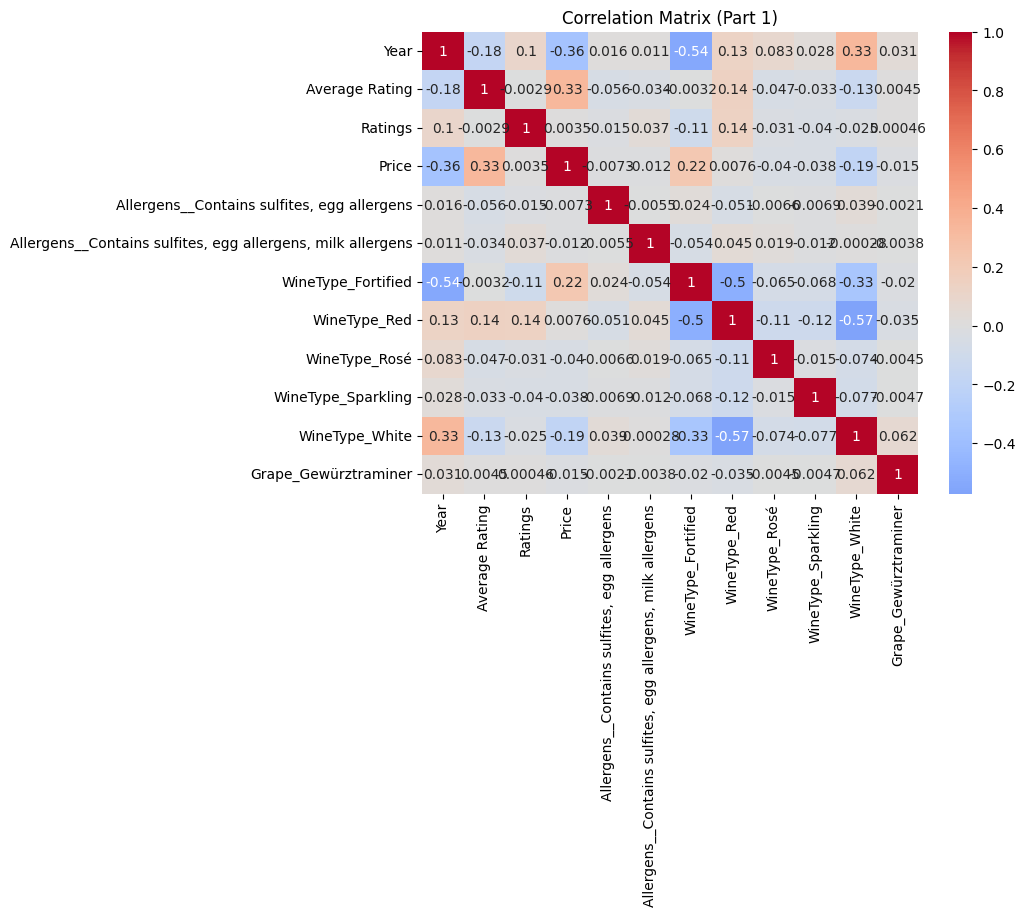

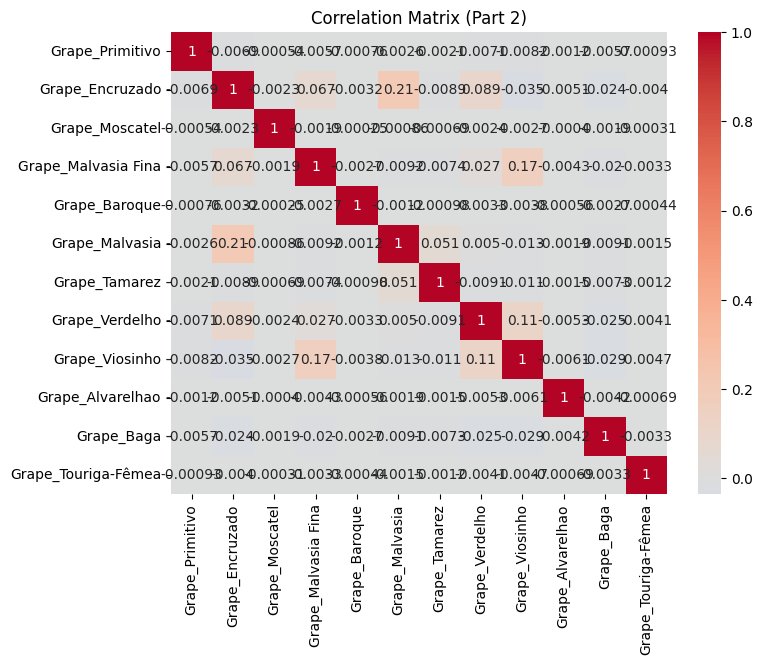

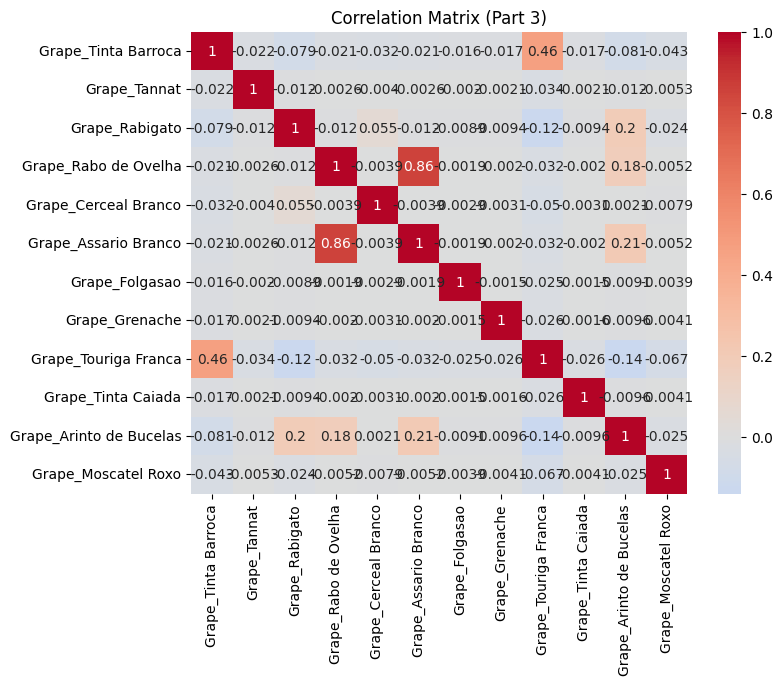

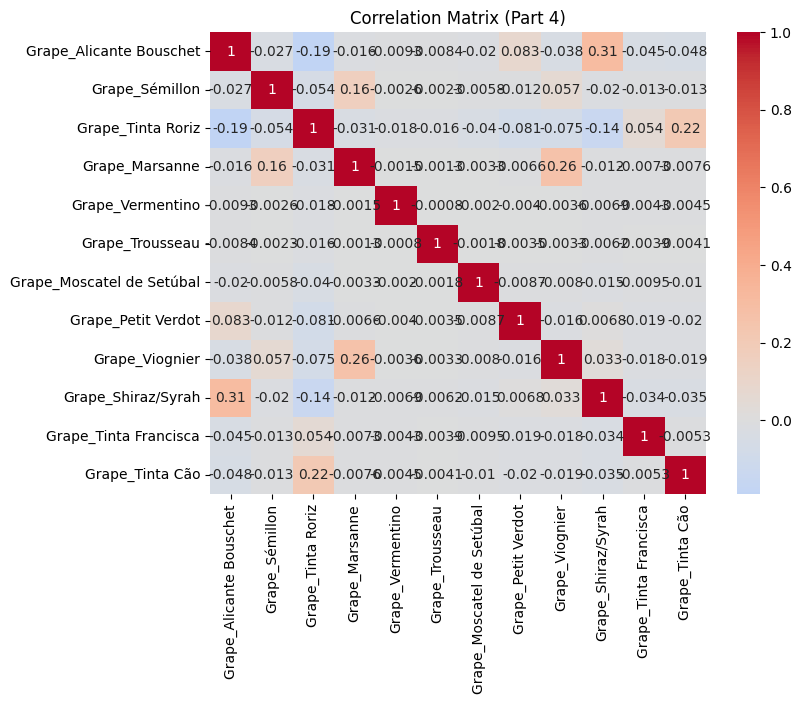

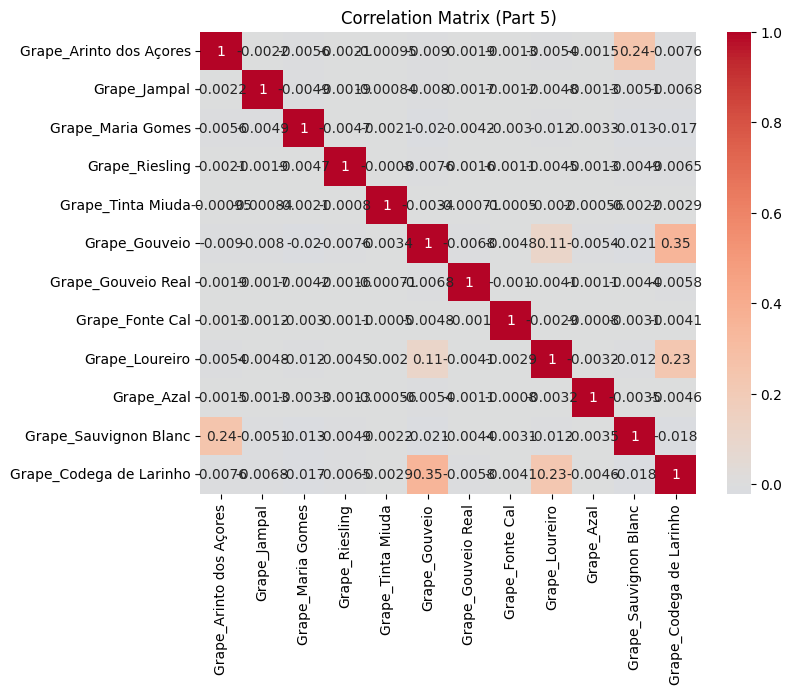

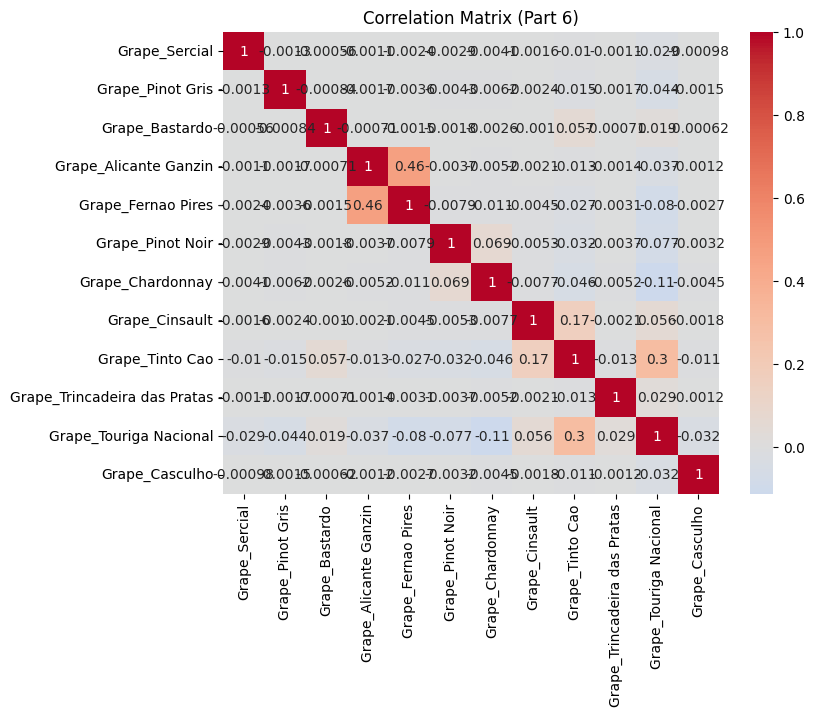

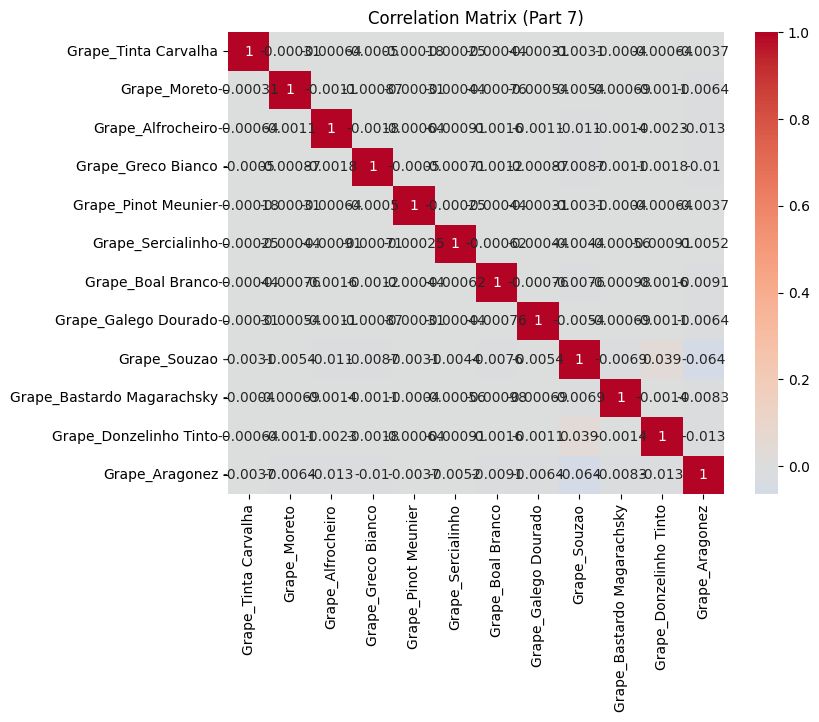

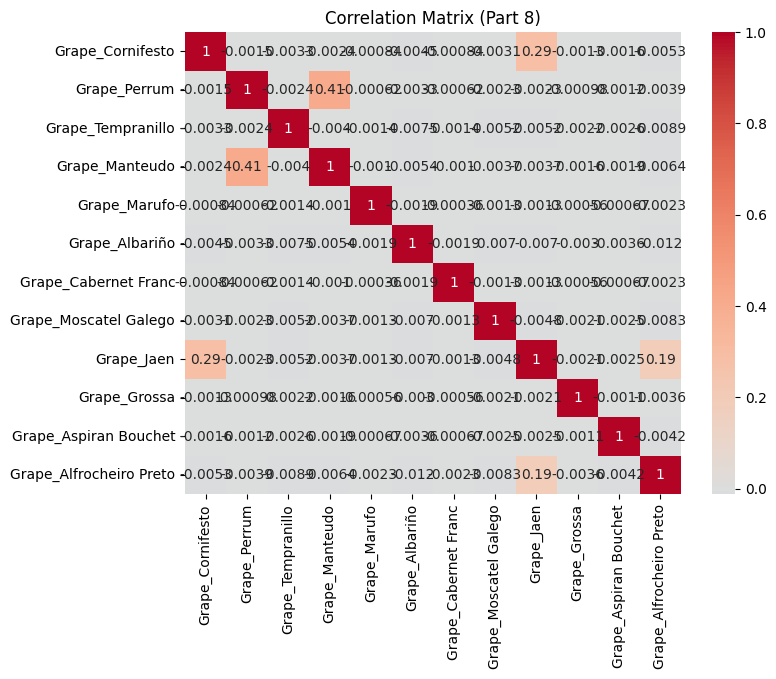

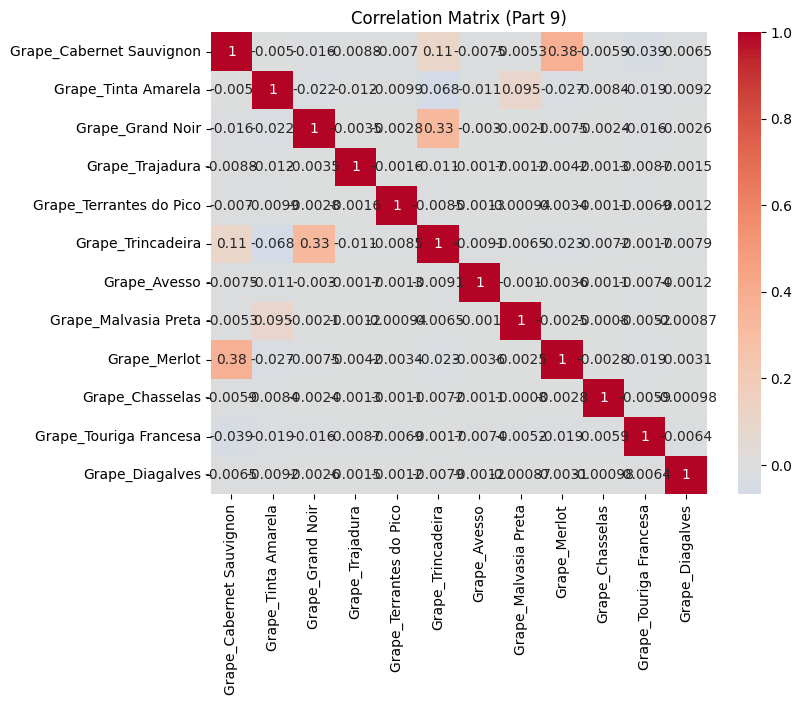

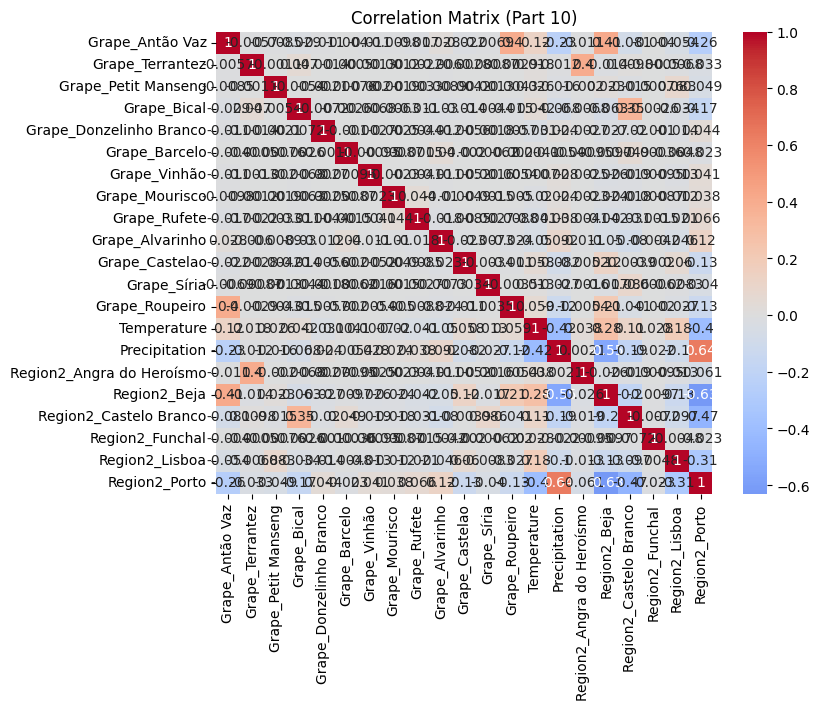

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the columns into parts for better visualization
num_parts = 10  
part_size = len(wine_data.columns) // num_parts

for i in range(num_parts):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size if i < num_parts - 1 else len(wine_data.columns)
    
    # Extract the part of the correlation matrix
    correlation_matrix_part = wine_data.iloc[:, start_idx:end_idx].corr()
    
    # Create a heatmap for the part
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_part, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix (Part {i+1})')
    plt.show()


In [90]:
wine_data.corr()

,Year,Average Rating,Ratings,Price,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,...,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation,Region2_Angra do Heroísmo,Region2_Beja,Region2_Castelo Branco,Region2_Funchal,Region2_Lisboa,Region2_Porto
Year,1.000000,-0.175671,0.102156,-0.359822,0.016323,0.011498,-0.543705,0.131446,0.082847,0.028399,...,0.024697,0.042717,0.246098,-0.085892,0.041234,0.107948,0.089569,0.013936,0.080355,-0.194411
Average Rating,-0.175671,1.000000,-0.002939,0.334566,-0.055699,-0.033514,-0.003216,0.141233,-0.047031,-0.033138,...,-0.016224,-0.081896,-0.061260,-0.031171,-0.008790,0.036615,-0.046267,0.004286,-0.083809,0.042746
Ratings,0.102156,-0.002939,1.000000,0.003548,-0.014521,0.036947,-0.110249,0.136433,-0.031183,-0.039834,...,-0.010751,0.116053,0.034148,-0.060194,-0.001695,0.157702,-0.073659,-0.006256,-0.000959,-0.079784
Price,-0.359822,0.334566,0.003548,1.000000,-0.007318,-0.011995,0.221880,0.007628,-0.039639,-0.038153,...,-0.012919,-0.037057,-0.126766,0.043620,-0.005595,-0.041004,-0.068640,-0.004571,-0.076190,0.118632
"Allergens__Contains sulfites, egg allergens",0.016323,-0.055699,-0.014521,-0.007318,1.000000,-0.005490,0.024495,-0.051292,-0.006636,-0.006924,...,-0.001805,-0.005927,-0.014392,0.031361,-0.002760,-0.028293,-0.021053,-0.001042,-0.014036,0.044957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Region2_Beja,0.107948,0.036615,0.157702,-0.041004,-0.028293,-0.051065,-0.277218,0.212522,0.004933,-0.064411,...,-0.016792,0.209473,0.279628,-0.549952,-0.025669,1.000000,-0.195833,-0.009692,-0.130559,-0.629338
Region2_Castelo Branco,0.089569,-0.046267,-0.073659,-0.068640,-0.021053,-0.037997,-0.203717,0.018593,0.012753,0.194632,...,0.085748,-0.041022,0.106485,-0.191423,-0.019100,-0.195833,1.000000,-0.007211,-0.097148,-0.468288
Region2_Funchal,0.013936,0.004286,-0.006256,-0.004571,-0.001042,-0.001880,-0.010208,-0.017569,-0.002273,-0.002372,...,-0.000618,-0.002030,0.027810,-0.022146,-0.000945,-0.009692,-0.007211,1.000000,-0.004808,-0.023175
Region2_Lisboa,0.080355,-0.083809,-0.000959,-0.076190,-0.014036,-0.025332,-0.048301,-0.067573,0.032305,-0.013839,...,-0.008330,-0.027349,0.184530,-0.101621,-0.012734,-0.130559,-0.097148,-0.004808,1.000000,-0.312201


## Feature Scaling, Selection

In [91]:
features = wine_data.drop('Average Rating', axis=1)
target = wine_data[['Average Rating']]

In [92]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)


In [93]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

normalizer = normalizer.fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns)
X_train_normalized.head()

,Year,Ratings,Price,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,WineType_White,...,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation,Region2_Angra do Heroísmo,Region2_Beja,Region2_Castelo Branco,Region2_Funchal,Region2_Lisboa,Region2_Porto
0,0.854839,0.014802,0.027422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.780488,0.516639,0.0,0.0,1.0,0.0,0.0,0.0
1,0.822581,0.008608,0.019667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.853659,0.384814,0.0,1.0,0.0,0.0,0.0,0.0
2,0.951613,0.000840,0.052721,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.829268,0.210452,0.0,1.0,0.0,0.0,0.0,0.0
3,0.854839,0.149486,0.009035,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.848780,0.253750,0.0,1.0,0.0,0.0,0.0,0.0
4,0.758065,0.002834,0.072888,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.814634,0.202777,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
import pickle

# Save the normalizer to a file
with open("min_max_scaler.pkl", "wb") as file:
    pickle.dump(normalizer, file)

In [94]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test.columns)
X_test_normalized.head()

,Year,Ratings,Price,"Allergens__Contains sulfites, egg allergens","Allergens__Contains sulfites, egg allergens, milk allergens",WineType_Fortified,WineType_Red,WineType_Rosé,WineType_Sparkling,WineType_White,...,Grape_Síria,Grape_Roupeiro,Temperature,Precipitation,Region2_Angra do Heroísmo,Region2_Beja,Region2_Castelo Branco,Region2_Funchal,Region2_Lisboa,Region2_Porto
0,0.822581,0.196830,0.030609,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.853659,0.384814,0.0,1.0,0.0,0.0,0.0,0.0
1,0.854839,0.000315,0.033998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.770732,0.434673,0.0,0.0,0.0,0.0,0.0,1.0
2,0.596774,0.013332,0.022682,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.775610,0.800562,0.0,0.0,0.0,0.0,0.0,1.0
3,0.967742,0.000525,0.014072,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.848780,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
4,0.854839,0.021730,0.021105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.848780,0.253750,0.0,1.0,0.0,0.0,0.0,0.0


## Supervised Learning - Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=3, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest.fit(X_train, y_train)
print(forest.score(X_test,y_test))

0.31722434216283857


C:\Users\jardi\AppData\Local\Temp\ipykernel_15136\114636249.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


In [96]:
import xgboost

xgb_reg = xgboost.XGBRegressor(max_depth=5)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test,y_test)

0.4659881612912192

In [97]:
# Predictions for XGBoost Regressor
y_pred_xgb = xgb_reg.predict(X_test)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Calculate MAE for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb}")

XGBoost - Mean Absolute Error (MAE): 0.13084219798259772


In [99]:
# Calculate MAPE for XGBoost
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost - Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")

XGBoost - Mean Absolute Percentage Error (MAPE): 0.03%


In [100]:
'''XGBoost Regressor R-squared (R2) Score: 0.4664
XGBoost Mean Absolute Error (MAE): 0.1308
XGBoost Mean Absolute Percentage Error (MAPE): 0.03%

The R2 score indicates that the model is explaining a substantial portion of the variance in the target variable, and the low MAE and MAPE values suggest that the predictions are close to the actual ratings with very 
low percentage error.

It's important to note that different metrics provide complementary insights into the model's performance. The R2 score assesses the goodness of fit, while MAE and MAPE provide information about prediction accuracy 
and error magnitude.

'''

"XGBoost Regressor R-squared (R2) Score: 0.4664\nXGBoost Mean Absolute Error (MAE): 0.1308\nXGBoost Mean Absolute Percentage Error (MAPE): 0.03%\n\nThe R2 score indicates that the model is explaining a substantial portion of the variance in the target variable, and the low MAE and MAPE values suggest that the predictions are close to the actual ratings with very \nlow percentage error.\n\nIt's important to note that different metrics provide complementary insights into the model's performance. The R2 score assesses the goodness of fit, while MAE and MAPE provide information about prediction accuracy \nand error magnitude.\n\n"

## Pickle the Model

In [101]:
model_filename = 'xgboost_regressor_model.pkl'

# Save the model to the file using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_reg, model_file)
